In [3]:
import dash_core_components
print(dash_core_components.__version__)

0.40.3


In [4]:
import dash
import dash_core_components as dcc
import dash_html_components as html

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn;seaborn.set() 
from scipy.stats import norm 
from math import log
import scipy.stats as si


from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import Legend
from __future__ import division

##### Import the two stock prices data: AAPL,BAC,GE,M

In [2]:
AAPL = pd.read_csv("/Users/yifan.wu/Desktop/AAPL.csv", usecols = ['Date','Close'])
AAPL['Date'] = pd.to_datetime(AAPL.Date).dt.date
AAPL = AAPL.set_index('Date')
BAC = pd.read_csv("/Users/yifan.wu/Desktop/BAC.csv", usecols = ['Date','Close'])
BAC['Date'] = pd.to_datetime(BAC.Date).dt.date
BAC = BAC.set_index('Date')
GE = pd.read_csv("/Users/yifan.wu/Desktop/GE.csv", usecols = ['Date','Close'])
GE['Date'] = pd.to_datetime(GE.Date).dt.date
GE = GE.set_index('Date')
M = pd.read_csv("/Users/yifan.wu/Desktop/M.csv", usecols = ['Date','Close'])
M['Date'] = pd.to_datetime(M.Date).dt.date
M = M.set_index('Date')

In [3]:
def plot_price(price, length):
    data = price[:length]
    output_notebook()    
    plot = figure(width=600, height=400, title = "Historical Prices", x_axis_type="datetime")
    plot.line(data.index, data)
    plot.title.text_font_size = '12pt'
    show(plot)
    
plot_price(AAPL, 6000)

Loading BokehJS ...

##### Using moving average to different windows ( 5year windowed )

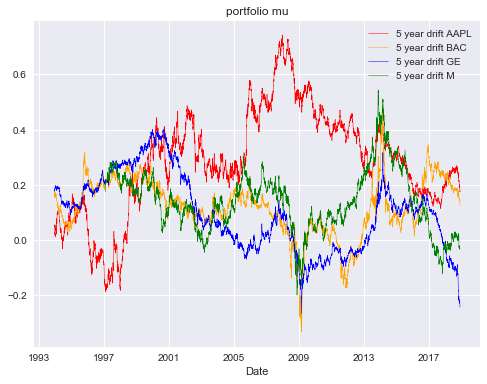

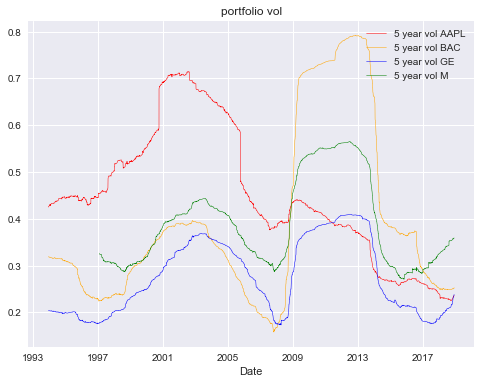

In [4]:
### windowed
def window(price, time, size):
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.rolling(window=size).std()/np.sqrt(time)
    mu = logreturn.rolling(window=size).mean()/time + (vol**2)/2
    para = pd.concat([price, mu, vol], axis=1)
    para.columns = ['price', 'mu', 'vol']
    para = para[len(para)-252*25:]
    return para

AAPL5 = window(AAPL,1/252,5*252)
BAC5 = window(BAC,1/252,5*252)
GE5= window(GE,1/252,5*252)
M5 = window(M,1/252,5*252)


fig,ax=plt.subplots(figsize=(8,6))
AAPL5.iloc[:,1].plot(color='red',linewidth=0.5,label='5 year drift AAPL')
BAC5.iloc[:,1].plot(color='orange',linewidth=0.5,label='5 year drift BAC')
GE5.iloc[:,1].plot(color='blue',linewidth=0.5,label='5 year drift GE')
M5.iloc[:,1].plot(color='green',linewidth=0.5,label='5 year drift M')
plt.legend(loc='upper right')
plt.title('portfolio mu')
plt.show()

fig,ax=plt.subplots(figsize=(8,6))
AAPL5.iloc[:,2].plot(color='red',linewidth=0.5,label='5 year vol AAPL')
BAC5.iloc[:,2].plot(color='orange',linewidth=0.5,label='5 year vol BAC')
GE5.iloc[:,2].plot(color='blue',linewidth=0.5,label='5 year vol GE')
M5.iloc[:,2].plot(color='green',linewidth=0.5,label='5 year vol M')
plt.legend(loc='upper right')
plt.title('portfolio vol')
plt.show()

######  Construction of the Portfolio 

##### stock

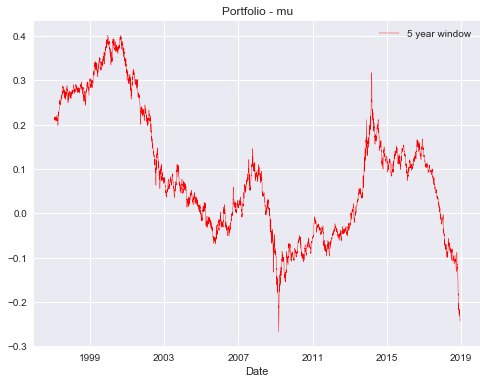

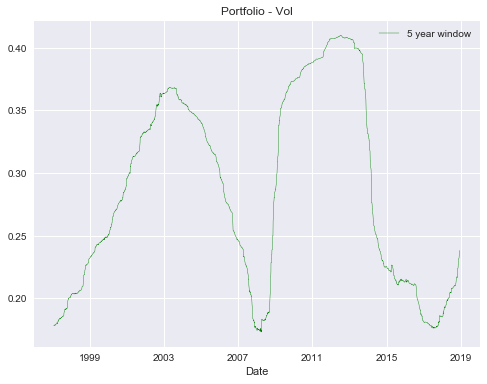

In [5]:
porttwostock = pd.concat([AAPL,BAC,GE,M], axis = 1, join = 'inner')
porttwostock['Portfolio'] =porttwostock.iloc[:, 0]*10000/AAPL.iloc[2520]+ porttwostock.iloc[:, 1]*10000/BAC.iloc[2520]+porttwostock.iloc[:, 2]*10000/GE.iloc[2520]+porttwostock.iloc[:, 3]*10000/M.iloc[2520] 

### window
def portfolio2(price, time, size):
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.rolling(window=size).std()/np.sqrt(time)
    mu = logreturn.rolling(window=size).mean()/time + (vol**2)/2
    para = pd.concat([price, mu, vol], axis=1)
    para.columns = ['price', 'mu', 'vol']
    para = para[len(para)-252*25:]
    return para

portfolio5Ywindow= portfolio2(porttwostock.iloc[:, 2], 1/252,5*252)


### mu of 2 5 10
fig,ax=plt.subplots(figsize=(8,6))
portfolio5Ywindow.iloc[:,1].plot(color = "red", linewidth = 0.4, label = "5 year window")
plt.legend(loc='upper right')
plt.title('Portfolio - mu')
plt.show()

###  vol of 2 5 10
fig,ax=plt.subplots(figsize=(8,6))
portfolio5Ywindow.iloc[:,2].plot(color = "green", linewidth = 0.4, label = "5 year window")
plt.legend(loc='upper right')
plt.title('Portfolio - Vol')
plt.show()

##### option 

In [ ]:
def option_loss_para():

##### 1. long position

######  Assuming the portfolio follows the GBM ,  para VAR AND ES

In [6]:
import scipy.stats as ss
### GBM of VaR and ES
def GBMVE(price, time, size,S0,T,p1,p2,r): 
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.rolling(window=size).std()/np.sqrt(time)
    mu = logreturn.rolling(window=size).mean()/time + (vol**2)/2
    St=S0*exp(mu-0.5*vol**2)*T
    d1=((r + 0.5 * vol0 ** 2) * T) / (vol0 * np.sqrt(T))
    var = S0-S0*np.exp(vol*T**(0.5)*ss.norm.ppf(1-p1)+(mu-pow(vol,2)/2)*T)
    es = S0 * (1 - np.exp(mu *T)/(1-p2) * ss.norm.cdf(ss.norm.ppf(1-p2) - T**(0.5)*vol))
    para = pd.concat([price, mu, vol,var,es], axis=1)
    para.columns = ['price', 'mu', 'vol','var','es']
    return para

###### Potfolio 1. GBM VaR and ES

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


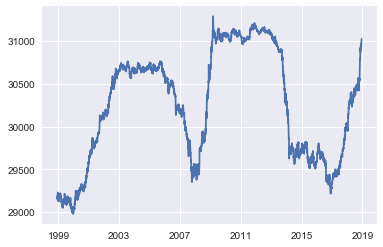

In [250]:
def Option_para(S0, r, sigma, T , opt_type):
    """opt_type: put or call """
    d1 = ((r + sigma**2 / 2) * T)/(sigma * np.sqrt(T)) 
    if opt_type=="Call":
        delta = ss.norm.cdf(d1)
        vega = ss.norm.pdf(d1)*S0*np.sqrt(T)
        return delta,vega
    else:
        delta = -ss.norm.cdf(-d1)
        vega = ss.norm.pdf(d1)*S0*np.sqrt(T)
    return delta,vega
def VaR_option_para(p0,S0,delta,sigma0,mu,T,invest1,invest2,p):
    share1 = invest1/S0
    share2 = invest2/p0
    VaR= share2*p0+share1*S0+delta*share2*S0-share2*p0-(share1+delta*share2)*S0*np.exp(sigma0*np.sqrt(T)*ss.norm.ppf(1-p)+(mu-sigma0**2/2)*T)
    return(VaR)
def euro_vanilla_put(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    put = (K * np.exp(-r * T) * ss.norm.cdf(-d2, 0.0, 1.0) - S * ss.norm.cdf(-d1, 0.0, 1.0))
    
    return put

def euro_vanilla_call(S, K, T, r, sigma):
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    call = S * si.norm.cdf(d1, 0.0, 1.0)-K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    return call

def est_para(price, windowlen,time):
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.rolling(window=windowlen*252).std()/np.sqrt(time)
    mu = logreturn.rolling(window=windowlen*252).mean()/time + (vol**2)/2
    return logreturn, mu, vol

def para_option(S0,r,T,windowlen,invest1,invest2,p,time,opt_type):
    logreturn,estmu,estvol = est_para(S0, windowlen,time)
    estdelta,estvega = Option_para(S0,r,estvol,T,opt_type)
    if opt_type == "Call":
        est_p0 = euro_vanilla_call(S0,S0,T,r,estvol)
    else:
        est_p0 = euro_vanilla_put(S0,S0,T,r,estvol)
    var = VaR_option_para(est_p0,S0,estdelta,estvol,estmu,T,invest1,invest2,0.99)
    return var

paracallvar=para_option(portfolio5Ywindow['price'],0.005,5/252,5,40000,10000,0.99,5/252,"Call")
paraputvar=para_option(portfolio5Ywindow['price'],0.005,5/252,5,40000,10000,0.99,5/252,"Put")
#plt.plot(paracallvar)
plt.plot(paracallvar)

## GBMp=GBMVE(portfolio5Ywindow['price'],1/252,5*252,40000,5/252,0.99,0.975)
GBMVARp=GBMp.iloc[:,3]
GBMESp=GBMp.iloc[:,4]
fig,ax=plt.subplots(figsize=(8,6))
GBMVARp.plot(color='r',linewidth = 0.5, label="GBM VaR")
GBMESp.plot(color='b',linewidth = 0.5, label="GBM ES")
plt.legend(loc='upper right')
plt.title('GBM VaR and ES portfolio')
plt.show()

##### 2. Historical VaR and ES

In [ ]:
def para_optionloss_his(v0,st,T,r,opt_type):
    sigma = portfolio5Ywindow['vol'][5*252:]
    #print(sigma)
    sigma0 = portfolio5Ywindow['vol'][5*252]
    #print(sigma0)
    mu = portfolio5Ywindow['mu']
    d1=((r + 0.5 * sigma0 ** 2) * T) / (sigma0 * np.sqrt(T))
    s0=portfolio5Ywindow['price'][5*252]
    #print(d1)
    if opt_type=="Call":
      delta = ss.norm.cdf(d1)
      vega=ss.norm.pdf(d1)*s0*np.sqrt(T)
    else:
      delta = -ss.norm.cdf(-d1)
      vega=ss.norm.pdf(-d1)*s0*np.sqrt(T)
    #print(delta)
    option_loss=v0*(delta*(st-s0)+vega*(sigma-sigma0))
    #print(st-s0)
    return(option_loss)

call_loss=para_optionloss_his(portfolio5Ywindow['price'][5*252],portfolio5Ywindow['price'][5*252:],1,0.005,"Call")
put_loss=para_optionloss_his(portfolio5Ywindow['price'][5*252],portfolio5Ywindow['price'][5*252:],1,0.005,"Put")


In [86]:
#### Call option VaR
logreturnp=pd.DataFrame(np.log(portfolio5Ywindow['price']/portfolio5Ywindow['price'].shift(5)))
A_his_VaR_yearspc = []
for i in range(len(logreturnp)-252*5):
    his_VaR_listp =logreturnp[i:i+252*5].sort_values(by='price')
    his_VaR_yearspc = 40000-40000*np.exp(his_VaR_listp.iloc[12])+min(call_loss.iloc[i:i+12])
    A_his_VaR_yearspc.append(his_VaR_yearspc)
A_his_VaR_yearspc
#### put option VaR  
A_his_VaR_yearspp = []
for i in range(len(logreturnp)-252*5):
    his_VaR_listp =logreturnp[i:i+252*5].sort_values(by='price')
    his_VaR_yearspp =40000-40000*np.exp(his_VaR_listp.iloc[12])+min(put_loss.iloc[i:i+12])
    A_his_VaR_yearspp.append(his_VaR_yearspp) 
A_his_VaR_yearspp

[]

In [99]:
#### call option es
logreturnp=pd.DataFrame(np.log(portfolio5Ywindow['price']/portfolio5Ywindow['price'].shift(5)))
A_his_ES_yearspc = []
for i in range(len(logreturnp)-252*5):
    his_VaR_listp =logreturnp[i:i+252*5].sort_values(by='price')
    hist_ES_listp =40000-40000*np.exp(his_VaR_listp[0:31])
    hist_ES_yearsp = np.mean(hist_ES_listp)+np.mean(call_loss.iloc[i:31+i])
    A_his_ES_yearspc.append(hist_ES_yearsp)
A_his_ES_yearspc
#### put option es
A_his_ES_yearspp = []
for i in range(len(logreturnp)-252*5):
    his_VaR_listp =logreturnp[i:i+252*5].sort_values(by='price')
    hist_ES_listp =40000-40000*np.exp(his_VaR_listp[0:31])
    hist_ES_yearsp = np.mean(hist_ES_listp)+np.mean(put_loss.iloc[i:31+i])
    A_his_ES_yearspp.append(hist_ES_yearsp)                       
A_his_ES_yearspp

[price    2929.782399
 dtype: float64, price    2928.872482
 dtype: float64, price    2927.54446
 dtype: float64, price    2926.090362
 dtype: float64, price    2928.06501
 dtype: float64, price    2926.793857
 dtype: float64, price    2925.830494
 dtype: float64, price    2924.436914
 dtype: float64, price    2922.763843
 dtype: float64, price    2920.936008
 dtype: float64, price    2918.919933
 dtype: float64, price    2916.369043
 dtype: float64, price    2915.096293
 dtype: float64, price    2913.687649
 dtype: float64, price    2912.479309
 dtype: float64, price    2912.038058
 dtype: float64, price    2912.12155
 dtype: float64, price    2912.367257
 dtype: float64, price    2913.17031
 dtype: float64, price    2913.631961
 dtype: float64, price    2913.906053
 dtype: float64, price    2914.751272
 dtype: float64, price    2915.262787
 dtype: float64, price    2915.684173
 dtype: float64, price    2915.707472
 dtype: float64, price    2916.072034
 dtype: float64, price    2916.2

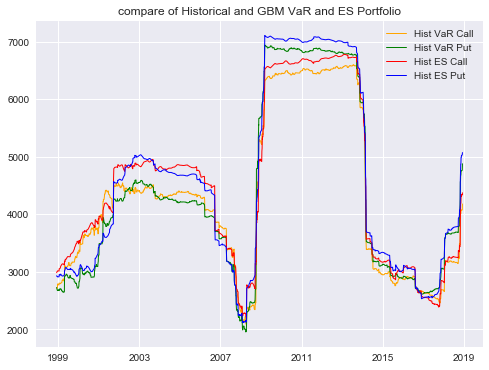

In [100]:
fig,ax=plt.subplots(figsize=(8,6))
#GBMVARp.plot(color='r',linewidth = 0.5, label="GBM VaR")
#GBMESp.plot(color='b',linewidth = 0.5, label="GBM ES")
plt.plot(portfolio5Ywindow.index[1260:],A_his_VaR_yearspc,color='orange',linewidth=1,label="Hist VaR Call")
plt.plot(portfolio5Ywindow.index[1260:],A_his_VaR_yearspp,color='green',linewidth=1,label="Hist VaR Put")
plt.plot(portfolio5Ywindow.index[1260:],A_his_ES_yearspc,color='red',linewidth=1,label="Hist ES Call")
plt.plot(portfolio5Ywindow.index[1260:],A_his_ES_yearspp,color='blue',linewidth=1,label="Hist ES Put")
plt.legend(loc='upper right')
plt.title('compare of Historical and GBM VaR and ES Portfolio')
plt.show()

##### 3. Monte Carlo VaR

In [9]:
random=[]
for i in range(GBMp.shape[0]):
    mcmc=norm.ppf(np.random.rand())
    random.append(mcmc)
def GBMMTVE(price, time, size,S0,T,p1,p2,random): 
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.rolling(window=size).std()/np.sqrt(time)
    eps = vol*random
    mu = logreturn.rolling(window=size).mean()/time + (vol**2)/2
    var = S0-S0*np.exp(vol*T**(0.5)*ss.norm.ppf(1-p1)+(mu+eps-pow(vol,2)/2)*T)
    es = S0 * (1 - np.exp((mu+eps) *T)/(1-p2) * ss.norm.cdf(ss.norm.ppf(1-p2) - T**(0.5)*vol))
    para = pd.concat([price, mu, vol,var,es], axis=1)
    para.columns = ['price', 'mu', 'vol','var','es']
    return para
GBMMTp=GBMMTVE(portfolio5Ywindow['price'],1/252,5*252,10000,5/252,0.99,0.975,random)

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


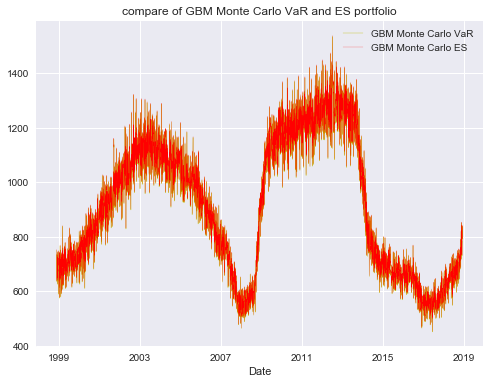

In [10]:
fig,ax=plt.subplots(figsize=(8,6))
GBMMTp.iloc[:,3].plot(color='y',linewidth = 0.35, label="GBM Monte Carlo VaR")
GBMMTp.iloc[:,4].plot(color='r',linewidth = 0.2, label="GBM Monte Carlo ES")
plt.legend(loc='upper right')
plt.title('compare of GBM Monte Carlo VaR and ES portfolio')
plt.show()

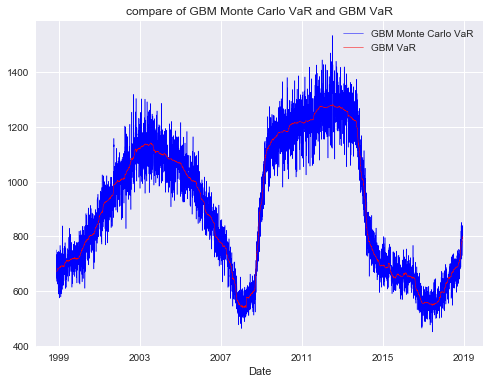

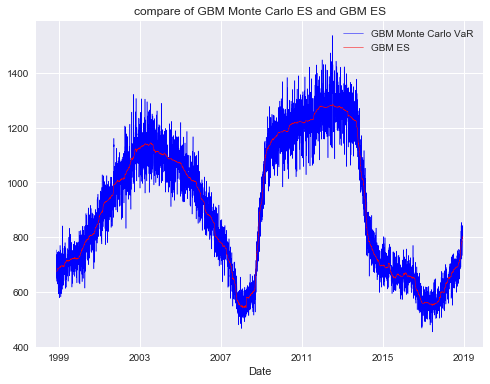

In [11]:
fig,ax=plt.subplots(figsize=(8,6))
GBMMTp.iloc[:,3].plot(color='blue',linewidth = 0.5, label="GBM Monte Carlo VaR")
GBMVARp.plot(color='red',linewidth = 0.5, label="GBM VaR")
plt.legend(loc='upper right')
plt.title('compare of GBM Monte Carlo VaR and GBM VaR')
plt.show()

fig,ax=plt.subplots(figsize=(8,6))
GBMMTp.iloc[:,4].plot(color='blue',linewidth = 0.5, label="GBM Monte Carlo VaR")
GBMESp.plot(color='red',linewidth = 0.5, label="GBM ES")
plt.legend(loc='upper right')
plt.title('compare of GBM Monte Carlo ES and GBM ES')
plt.show()

##### 5. Backtesting

In [12]:
### GBM of VaR and ES
def GBMVESHORT(price, time, size,S0,T,p1,p2): 
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.rolling(window=size).std()/np.sqrt(time)
    mu = logreturn.rolling(window=size).mean()/time + (vol**2)/2
    var = -(S0-S0*np.exp(vol*T**(0.5)*ss.norm.ppf(1-p1)+(mu-pow(vol,2)/2)*T))
    es=(0.975*S0 * (1 - np.exp(mu *T)/(1-0.025) * ss.norm.cdf(ss.norm.ppf(1-0.025) - T**(0.5)*vol))-S0 * (1 - np.exp(mu *T)/(1) * ss.norm.cdf(ss.norm.ppf(1) - T**(0.5)*vol)))/(0.025)
    para = pd.concat([price, mu, vol,var,es], axis=1)
    para.columns = ['price', 'mu', 'vol','var','es']
    return para

def GBMVELONG(price, time, size,S0,T,p1,p2): 
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.rolling(window=size).std()/np.sqrt(time)
    mu = logreturn.rolling(window=size).mean()/time + (vol**2)/2
    var = S0-S0*np.exp(vol*T**(0.5)*ss.norm.ppf(1-p1)+(mu-pow(vol,2)/2)*T)
    es = S0 * (1 - np.exp(mu *T)/(1-p2) * ss.norm.cdf(ss.norm.ppf(1-p2) - T**(0.5)*vol))
    para = pd.concat([price, mu, vol,var,es], axis=1)
    para.columns = ['price', 'mu', 'vol','var','es']
    return para

In [13]:
### Portfolio Long 
def portfolio(price, time, weight):
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.ewm(alpha = 1 - weight).std()/np.sqrt(time)
    mu = logreturn.ewm(alpha = 1 - weight).mean()/time + (vol**2)/2
    para = pd.concat([price, mu, vol], axis=1)
    para.columns = ['price', 'mu', 'vol']
    para = para[len(para)-252*25:]
    para = para.loc[para.index >= pd.to_datetime('1997-08-07').date()]
    return para

GBMLONG = GBMVELONG(portfolio5Ywindow.iloc[:,0],1/252,5*252,10000,5/252,0.99,0.975)
gbmlongvar=GBMLONG['var'][252*5:]

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


Text(0.5,1,'Port Long,5 days, 5 year-window Exceptions Per Year')

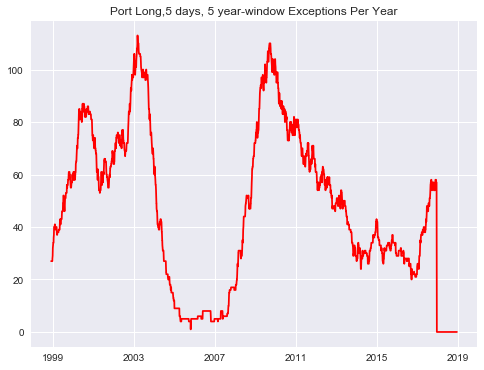

In [105]:
S0=40000
numberexception=[]
for i in range(len(gbmlongvar)):
    window=portfolio5Ywindow['price'][(len(gbmlongvar)-i-252):(len(gbmlongvar)-i-1)]
    exception=0
    for j in range(len(window) - 4):
        share=S0/window[j]
        price0=window[j]
        pricet = window[j+4]
        loss = S0 - pricet * share
        if loss > gbmlongvar[len(gbmlongvar)-i-252 + j]:
            exception = exception + 1
        else:
            exception = exception 
    
    numberexception.append(exception)
fig,ax=plt.subplots(figsize=(8,6))
plt.plot(portfolio5Ywindow.index[1260:9631],numberexception,color='r')
plt.title('Port Long,5 days, 5 year-window Exceptions Per Year')

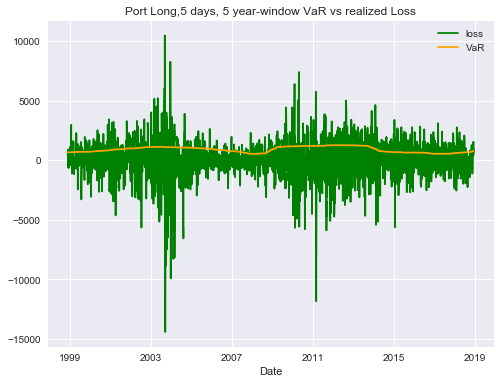

In [106]:
#### Portolio vs realized loss 
loss=[ ]
for i in range(len(gbmlongvar)):
    price0 = portfolio5Ywindow['price'][len(gbmlongvar)-i+5]
    pricet = portfolio5Ywindow['price'][len(gbmlongvar)-i+1]
    share = S0/price0
    loss.append((price0 - pricet)*share)
fig,ax=plt.subplots(figsize=(8,6))
plt.plot(portfolio5Ywindow.index[1260:9631],loss,color='green',label="loss")
gbmlongvar.plot(color='orange',label="VaR")
legend = ax.legend(loc='upper right', shadow=True)
plt.title('Port Long,5 days, 5 year-window VaR vs realized Loss')
plt.show()

##### 2. short position

#### 2.1 para gbm var and es

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


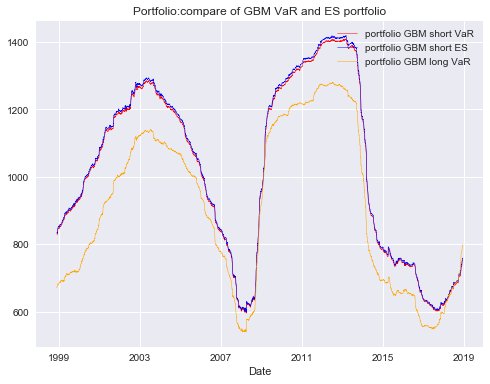

In [16]:
### PORTFOLIO
GBMSHORTp=GBMVESHORT(portfolio5Ywindow['price'],1/252,5*252,10000,5/252,0.01,0.975)
GBMlongp=GBMVE(portfolio5Ywindow['price'],1/252,5*252,10000,5/252,0.99,0.975)
GBMlongvarp=GBMlongp.iloc[:,3]
GBMlongesp=GBMlongp.iloc[:4]
GBMVARSHORTp=GBMSHORTp.iloc[:,3]
GBMESSHORTp=GBMSHORTp.iloc[:,4]
fig,ax=plt.subplots(figsize=(8,6))
GBMVARSHORTp.plot(color='r',linewidth = 0.5, label="portfolio GBM short VaR")
GBMESSHORTp.plot(color='b',linewidth = 0.5, label="portfolio GBM short ES")
GBMlongvarp.plot(color='orange',linewidth = 0.5, label="portfolio GBM long VaR")
plt.legend(loc='upper right')
plt.title('Portfolio:compare of GBM VaR and ES portfolio')
plt.show()

##### 2.2 monte carlo

/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


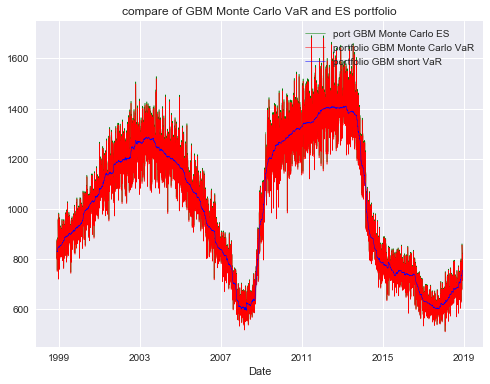

In [17]:
random=[]
for i in range(GBMSHORTp.shape[0]):
    mcmc=norm.ppf(np.random.rand())
    random.append(mcmc)
    
def GBMMTshort(price, time, size,S0,T,p1,p2,random): 
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.rolling(window=size).std()/np.sqrt(time)
    eps = vol*random
    mu = logreturn.rolling(window=size).mean()/time + (vol**2)/2
    var = -(S0-S0*np.exp(vol*T**(0.5)*ss.norm.ppf(1-p1)+(mu+eps-pow(vol,2)/2)*T))
    es = (0.975*S0*(1 - np.exp((mu+eps)*T)/(1-0.025) * ss.norm.cdf(ss.norm.ppf(1-0.025) - T**(0.5)*vol))-S0*(1-np.exp((mu+eps)*T)/(1)*ss.norm.cdf(ss.norm.ppf(1)-T**(0.5)*vol)))/(0.025)
    para = pd.concat([price, mu, vol,var,es], axis=1)
    para.columns = ['price', 'mu', 'vol','var','es']
    return para
GBMMTp=GBMMTshort(portfolio5Ywindow['price'],1/252,5*252,10000,5/252,0.01,0.975,random)

fig,ax=plt.subplots(figsize=(8,6))
GBMMTp.iloc[:,4].plot(color='green',linewidth = 0.5, label="port GBM Monte Carlo ES")
GBMMTp.iloc[:,3].plot(color='r',linewidth = 0.5, label="portfolio GBM Monte Carlo VaR")
GBMVARSHORTp.plot(color='b',linewidth = 0.5, label="portfolio GBM short VaR")
plt.legend(loc='upper right')
plt.title('compare of GBM Monte Carlo VaR and ES portfolio')
plt.show()

##### 2.4 backtesting

Text(0.5,1,'Port short,5 days, 5 year-window Exceptions Per Year')

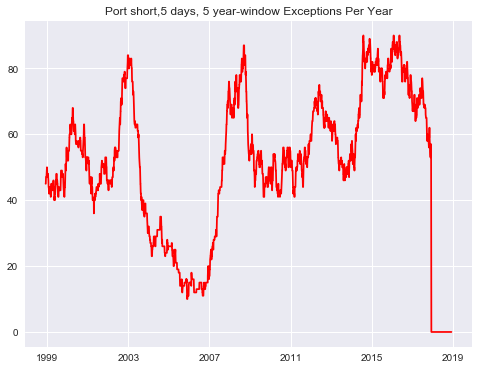

In [103]:
### Portfolio short position
gbmshortvar=GBMSHORTp['var'][252*5:]

S0=40000
numberexception2=[]
for i in range(0,len(gbmshortvar)):
    window2=portfolio5Ywindow['price'][(len(gbmshortvar)-i-252):(len(gbmshortvar)-i)]
    exception2=0
    for j in range(1,len(window2) - 4):
        share=S0/window2[j]
        price0=window2[j]
        pricet = window2[j+4]
        loss = (pricet-price0)* share
        loss = -loss
        if loss < -gbmshortvar[i]:
            exception2 = exception2 + 1
        else:
            exception2 = exception2
    
    numberexception2.append(exception2)
fig,ax=plt.subplots(figsize=(8,6))
plt.plot(portfolio5Ywindow.index[1260:9631],numberexception2,color='r')
plt.title('Port short,5 days, 5 year-window Exceptions Per Year')

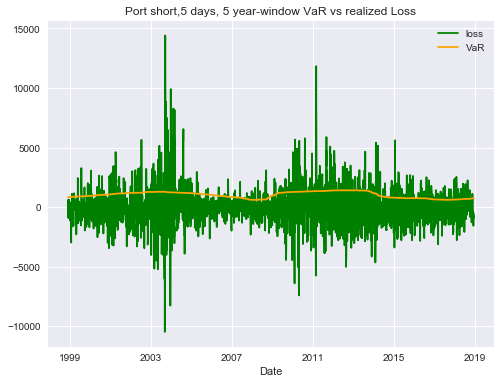

In [104]:
#### port short vs realized loss 
loss=[ ]
for i in range(0,len(gbmshortvar)):
    price0 = portfolio5Ywindow['price'][len(gbmshortvar)-i+5]
    pricet = portfolio5Ywindow['price'][len(gbmshortvar)-i+1]
    share = S0/price0
    loss.append(-(price0 - pricet)*share)
    
fig,ax=plt.subplots(figsize=(8,6))
plt.plot(portfolio5Ywindow.index[1260:9631],loss,color='green',label="loss")
gbmshortvar.plot(color='orange',label="VaR")
legend = ax.legend(loc='upper right', shadow=True)
plt.title('Port short,5 days, 5 year-window VaR vs realized Loss')
plt.show()

##### Historical VaR
##### Loss of option

In [42]:
def para_optionloss(v0,st,T,r,opt_type):
    sigma = portfolio5Ywindow['vol'][5*252:]
    #print(sigma)
    sigma0 = portfolio5Ywindow['vol'][5*252]
    #print(sigma0)
    mu = portfolio5Ywindow['mu']
    d1=((r + 0.5 * sigma0 ** 2) * T) / (sigma0 * np.sqrt(T))
    s0=portfolio5Ywindow['price'][5*252]
    #print(d1)
    if opt_type=="Call":
      delta = ss.norm.cdf(d1)
      vega=ss.norm.pdf(d1)*s0*np.sqrt(T)
    else:
      delta = -ss.norm.cdf(-d1)
      vega=ss.norm.pdf(-d1)*s0*np.sqrt(T)
    #print(delta)
    option_loss=v0*(delta*(st-s0)+vega*(sigma-sigma0))
    #print(st-s0)
    return(option_loss)
call_loss=para_optionloss(portfolio5Ywindow['price'][5*252],portfolio5Ywindow['price'][5*252:],1,0.005,"Call")
put_loss=para_optionloss(portfolio5Ywindow['price'][5*252],portfolio5Ywindow['price'][5*252:],1,0.005,"Put")

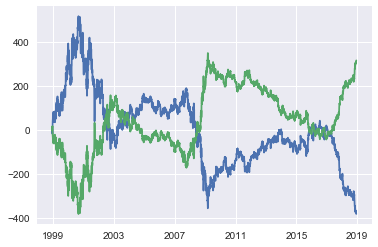

In [43]:
plt.plot(call_loss)
plt.plot(put_loss)

In [161]:
portfolio5Ywindow['price'][0]

8.34375

In [211]:
def euro_vanilla_call(S, K, T, r, sigma):
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    call = S * si.norm.cdf(d1, 0.0, 1.0)-K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    return call

def euro_vanilla_put(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    put = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    return put

def VaR_monte(mu,vol,option_type):
    T=5/252
    w1 = norm.ppf(np.random.rand(10000))
    w1 = w1*(T**0.5)
    St = portfolio5Ywindow['price'][-1]*np.exp((mu-(vol**2)/2)*T + vol*w1)
    if option_type == "Call":
        Vt = euro_vanilla_call(portfolio5Ywindow['price'][-1],St,1,0.005,portfolio5Ywindow['vol'][-1])

        loss = 30000/portfolio5Ywindow['price'][-1]*(portfolio5Ywindow['price'][-1]-St)+10000/Vt*(Vt-np.max((portfolio5Ywindow['price'][-1]-St),0))

        VaR = np.percentile(loss,99)
    else:
        Vt = euro_vanilla_put(portfolio5Ywindow['price'][-1],St,1,0.005,portfolio5Ywindow['vol'][5*252])
        loss = 30000/portfolio5Ywindow['price'][-1]*(portfolio5Ywindow['price'][-1]-St)+10000/Vt*(Vt-np.max((St-portfolio5Ywindow['price'][-1]),0))
        VaR = np.percentile(loss,99)

    return VaR 
VaR_mc = list(map(VaR_monte,portfolio5Ywindow['mu'][5*252:],portfolio5Ywindow['vol'][5*252:],"Call"))
VaR_mp = list(map(VaR_monte,portfolio5Ywindow['mu'][5*252:],portfolio5Ywindow['vol'][5*252:],"Put"))



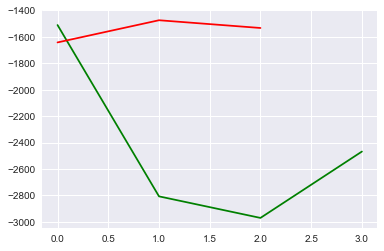

In [212]:
plt.plot(VaR_mc,color='g')
plt.plot(VaR_mp,color='red')

In [213]:
VaR_monte(portfolio5Ywindow['mu'][5*252+2],portfolio5Ywindow['vol'][5*252+2],"Call")

2674.2471385125286

In [214]:
VaR_mc

[-1510.3999090355449,
 -2806.5507726358933,
 -2969.671568081614,
 -2467.5154203443867]

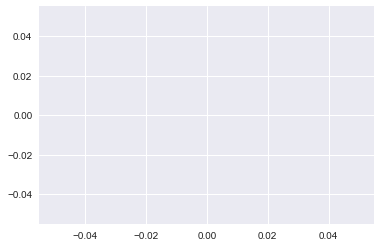

In [143]:
plt.plot(VaR_mc)